In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir(r'/content/drive/My Drive/AAI courses/AAI 521 CV/final_project')

In [2]:
path = "data/lfw-deepfunneled/lfw-deepfunneled"

pictures = []
labels = []

for person in os.listdir(path):
    curr_path = os.path.join(path, person)
    if os.path.isdir(curr_path):
        for pic in os.listdir(curr_path):
            if pic.endswith(".jpg"):
                pictures.append(plt.imread(os.path.join(curr_path, pic)))
                labels.append(person)

In [12]:
print(f"There is a total of {len(pictures)} pictures in the dataset")
print(f"There are {np.unique(labels)} celebrities")

There is a total of 13233 pictures in the dataset
There are ['AJ_Cook' 'AJ_Lamas' 'Aaron_Eckhart' ... 'Zumrati_Juma' 'Zurab_Tsereteli'
 'Zydrunas_Ilgauskas'] celebrities


Let's print a few of the pictures along with the celebrity names

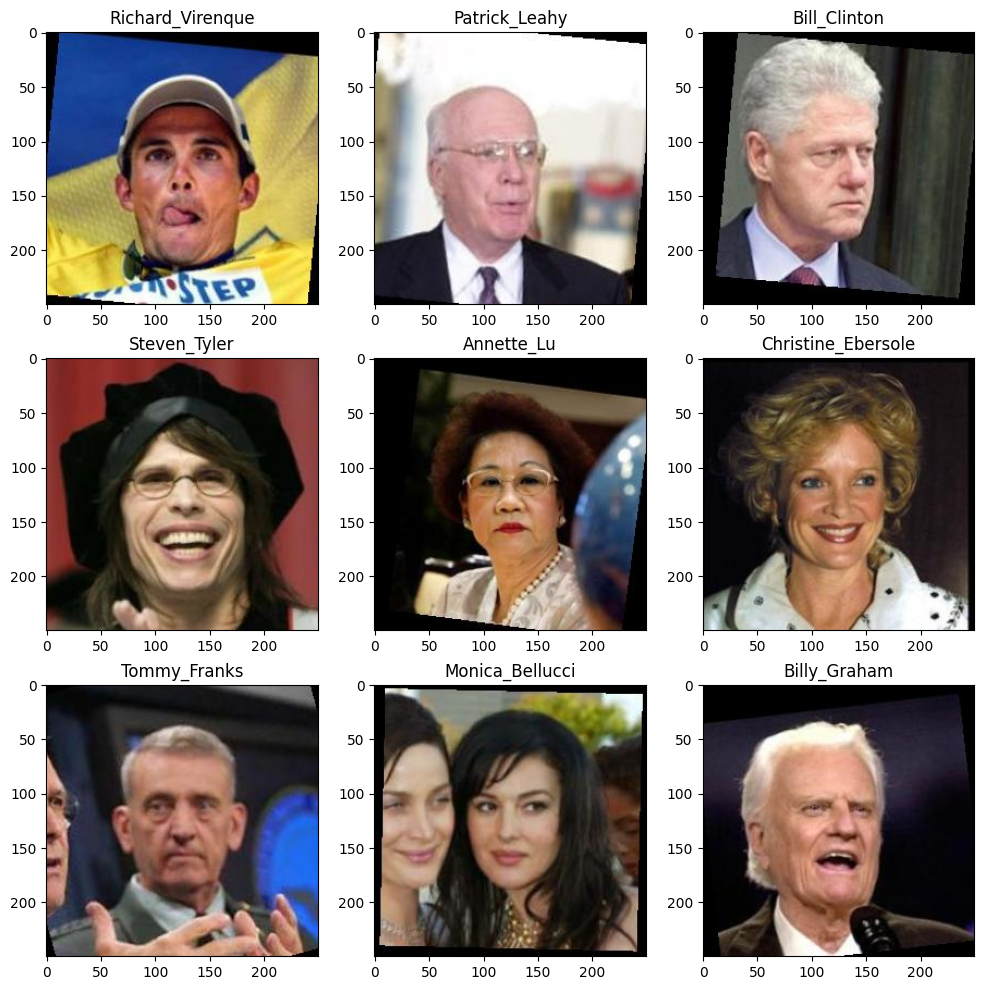

In [9]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i+1)
    idx = np.random.randint(0, len(pictures))
    plt.imshow(pictures[idx])
    plt.title(labels[idx])

plt.show()

As we can see above, the images all have the same resolution of 250x250 and 3 channels. We also notice that the images are rotated to some degree.

In [5]:
df = pd.DataFrame({"labels": labels, "images": pictures})

In [6]:
val_counts = df["labels"].value_counts()

print("Percentage of celebrities with 2 pictures or less: ",
      round(sum(val_counts.values <= 2) / len(val_counts) * 100, 2), "%",
     sep="")

Percentage of people with 2 pictures or less: 84.33%


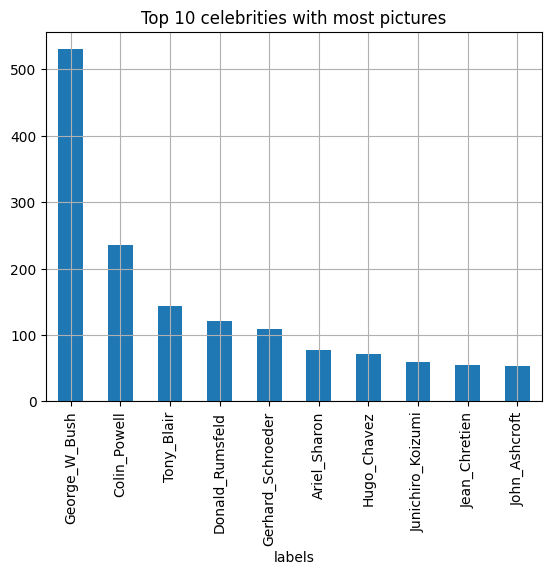

In [10]:
df["labels"].value_counts()[:10].plot(kind="bar")
plt.grid()
plt.title("Top 10 celebrities with most pictures")
plt.show()